In [15]:
# Imports
import keras
from keras.datasets import fashion_mnist
from keras import layers
from keras import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import os
from sklearn.metrics import accuracy_score

# load in the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# make sure that the data is all the right shape
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

seed = 100
os.environ['PYTHONHASHSEED']=str(seed)
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)


From the initial run i got an accuracy score of 0.84, when Dropout and another layer was added, this decreased to 0.82, however drpout reduces overfitting so a layer was removed to see the change. A random seed of 100 was added so there wasnt a major change everytime the model was ran

In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=256, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7339 - accuracy: 0.7304 - val_loss: 0.4881 - val_accuracy: 0.8187
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5239 - accuracy: 0.8114 - val_loss: 0.4530 - val_accuracy: 0.8405
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4828 - accuracy: 0.8273 - val_loss: 0.4096 - val_accuracy: 0.8502
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4576 - accuracy: 0.8357 - val_loss: 0.4046 - val_accuracy: 0.8592
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4390 - accuracy: 0.8409 - val_loss: 0.3860 - val_accuracy: 0.8631
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4277 - accuracy: 0.8461 - val_loss: 0.3876 - val_accuracy: 0.8588
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4137 - accuracy: 0.8493 - val_loss: 0.3851 - val_ac

In [17]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define an early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define a learning rate reduction callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Build your model
#model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape=(28, 28)))
#model.add(Dense(units=200, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(units=100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(units=10, activation='softmax'))

# Compile the model with an initial learning rate
#initial_learning_rate = 0.001
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),
              #loss='categorical_crossentropy',
              #metrics=['accuracy'])

# Train the model with both callbacks
#history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[reduce_lr, early_stopping])

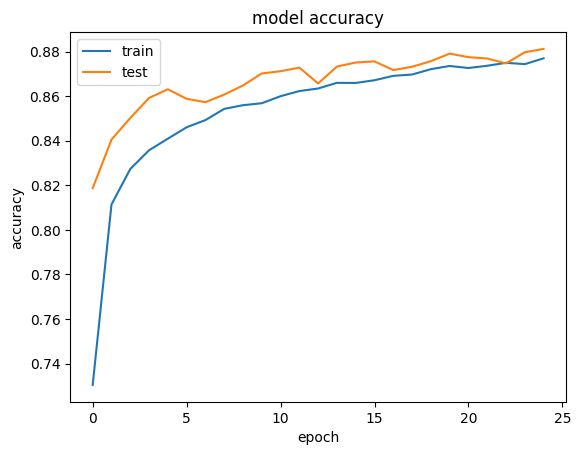

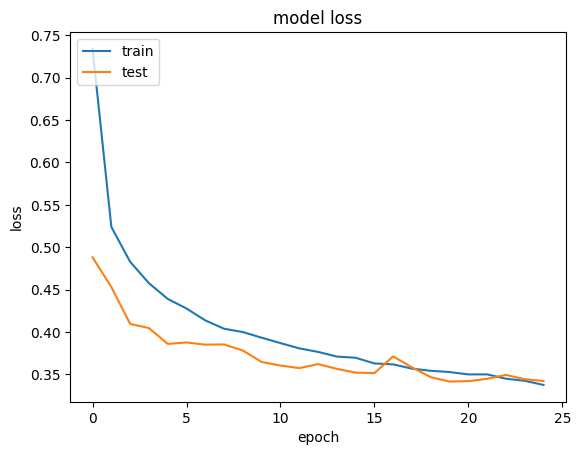

In [18]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [19]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_classes = np.argmax(y_test, axis=1)

In [21]:
accuracy = accuracy_score(y_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8812
